In [7]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os,sys,time
import numpy as np
import pandas as pd
import pymaster as nmt
import healpy as hp
import healpy.newvisufunc as hpn
import astropy.io.fits as fits
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from   IPython.display import clear_output
from matplotlib import cm
from matplotlib import rc
from copy import deepcopy as dcopy
rc('text', usetex=True)
font = {'weight' : 'bold','size'   : 22}
matplotlib.rc('font', **font)
#############################################
sys.path.insert(1, '/media/BINGODATA1/ComponentSeparation/beam_analyzes/scripts')
#import beam_modelling         as model
import handling_data          as hdata

In [26]:
output_info = {'type':'mask',
               'nside': 256,
               'dec':{'min': -90, 'max': 90},
               'ra':{'min':  None, 'max': None},
               'foreground_cut':True, 'perc_foreground_cut': 0.5,
               'apodization'   :False, 'apod_scale':0.5,'apod_type':'C2',
               "pathdir_FG"    :'/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/FG256',
               "nameFG"        :'FG_I_256_980mhz1260mhz_30bins_full_nonfrps_L0.fits',
               'output_dir'    :"/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/M256",
               'add_info'      : 'test'
              }

In [27]:
hdata.save_FITS_newformat_mask(output_info)

Filename mask_256_50fgcut_test.fits
Saving in /media/BINGODATA1/ComponentSeparation/building_dataset/dataset/M256/mask_256_50fgcut_test.fits
Saved.



In [30]:
mask = hdata.getmap(dirpath_=output_info['output_dir'], filename_='mask_256_50fgcut_test.fits', healpix_readingformat=False, hdu=1)

In [31]:
def getmaps_simple(pathmaps, mapsname):
    pathmaps = os.path.join(pathmaps, mapsname)
    with fits.open(pathmaps) as h:
        maps = h[0].data
    return maps

def getmaps_foregrounds(dir_foregrounds = None, bin_= None):
    if bin_!=None:
        AME  = getmaps_simple(dir_foregrounds,"psm_ame_rot_mK.fits")[bin_]
        CMB  = getmaps_simple(dir_foregrounds,"psm_cmb_rot_mK.fits")[bin_]
        FRPS = getmaps_simple(dir_foregrounds,"psm_frps_rot_mK.fits")[bin_]
        FREE = getmaps_simple(dir_foregrounds,"psm_free_rot_mK.fits")[bin_]
        SYNC = getmaps_simple(dir_foregrounds,"psm_synch_rot_mK.fits")[bin_]
    else:
        AME  = getmaps_simple(dir_foregrounds,"psm_ame_rot_mK.fits")
        CMB  = getmaps_simple(dir_foregrounds,"psm_cmb_rot_mK.fits")
        FRPS = getmaps_simple(dir_foregrounds,"psm_frps_rot_mK.fits")
        FREE = getmaps_simple(dir_foregrounds,"psm_free_rot_mK.fits")
        SYNC = getmaps_simple(dir_foregrounds,"psm_synch_rot_mK.fits")
    TOTAL = AME+CMB+FRPS+FREE+SYNC
    FG   = {"total": TOTAL,
            "cmb":   CMB,
            "frps":  FRPS,
            "ame":   AME,
            "ff":  FREE,
            "synch": SYNC
            }    
    return FG



In [32]:
dir_foregrounds = "/media/BINGODATA1/ComponentSeparation/MAPS/PAPER/PSM_Components"
FG = getmaps_foregrounds(dir_foregrounds=dir_foregrounds)
fg = dcopy(FG['total'][0])
ind = np.where(mask>0)
fg[ind]=hp.UNSEEN

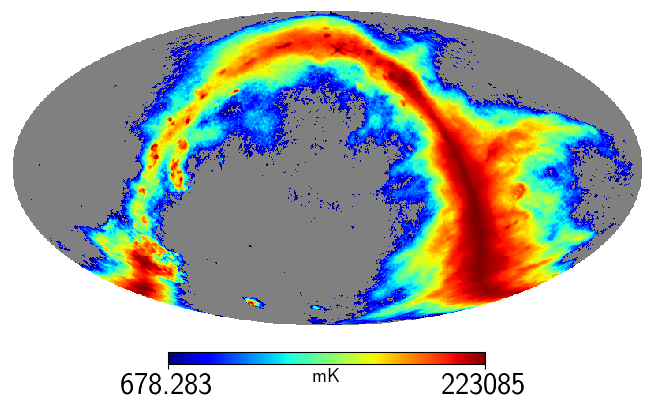

In [33]:
hp.mollview(fg,   norm="hist", cmap="jet", unit='mK', sub=111, title=None);